# Clasificador de imágenes con transfer learning
Vamos a diferenciar entre cuchara, cuchillo y tenedor con un dataset
con pocas imágenes. Si tenemos pocas imágenes para entyrenar la IA podemos
tener overfiting, que es que la ia se aprende los datos de entrenamiento
muy bien, pero luego falla mucho en las predicciones. Con transfer learning
aprovechamos un modelo ya entrenado y simplemente le enseñamos a distinguir lo que  nosotros queramos. En esta ocasión usaremos un modelo llamado MOBILENET_V2. Que es una red convolucional desarrollada por Google que fue entrenada con un set de datos gigantesco llamado imageNet, que contiene más de 10 millones de imágenes clasificadas. Está optimizada para trabajar con pocos recirsos. La modificaremos para adaptarla al proyecto. Está configurada para trabajar con imagenes de 224x224 px a color, es decir, con tres canales. La salida es una capa de clasificacion con 1001 neuronas, aunque esta capa la modificaremos, quitandole y añadiendole una nueva con tres neuronas de salida; cuchillo, tenedor y cuchara. Laúltima parte es la que hay que entrenar. Congelamos los parámetros del restod e capas para conservar sus pesos y sesgos y solo entrenaremos la última capa. Las primeras capas son capaces de "Ver" y diferenciar entre colores, texturas y formas y la última capa que añadiremos será la que haga que la red sepa diferenciar entre los distintos cubiertos.

Una técnica que se usa, creo que es fine tuning, es entrenar la última capa y luego entrenar de nuevo toda la red completa con ajustes pequeños con los pesos y los sesgos ya establecidos para mejorar la precisión.


In [2]:
#Crear las carpetas para subir las imagenes
!mkdir cuchillos
!mkdir cucharas
!mkdir tenedores

In [5]:
#Entrar en cada carpeta y descomprimir el archivo zip
import os
import rarfile

# Especificar la ruta de UnRAR si no está en variables de entorno (opcional)
rarfile.UNRAR_TOOL = r"C:\Program Files\WinRAR\UnRAR.exe"  # Ajusta esta ruta si es necesario

# Lista de carpetas que contienen los archivos RAR
folders = ["cuchillos", "tenedores", "cucharas"]

for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)
    rar_path = os.path.join(folder_path, f"{folder}.rar")

    if os.path.exists(rar_path):  # Verificar si el archivo RAR existe
        with rarfile.RarFile(rar_path, 'r') as rar_ref:
            rar_ref.extractall(folder_path)  # Extraer en la misma carpeta
        print(f"Descomprimido: {rar_path}")
    else:
        print(f"No se encontró: {rar_path}")

Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\cuchillos\cuchillos.rar
Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\tenedores\tenedores.rar
Descomprimido: c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\cucharas\cucharas.rar


In [6]:
#Borrar los archivo ZIP
!rm -rf /content/cucharas/cucharas.zip
!rm -rf /content/cuchillos/cuchillos.zip
!rm -rf /content/tenedores/tenedores.zip

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [33]:
import os

# Lista de carpetas donde están las imágenes
folders = ["cucharas", "cuchillos", "tenedores"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")


📂 cucharas: 351 imágenes
📂 cuchillos: 662 imágenes
📂 tenedores: 342 imágenes


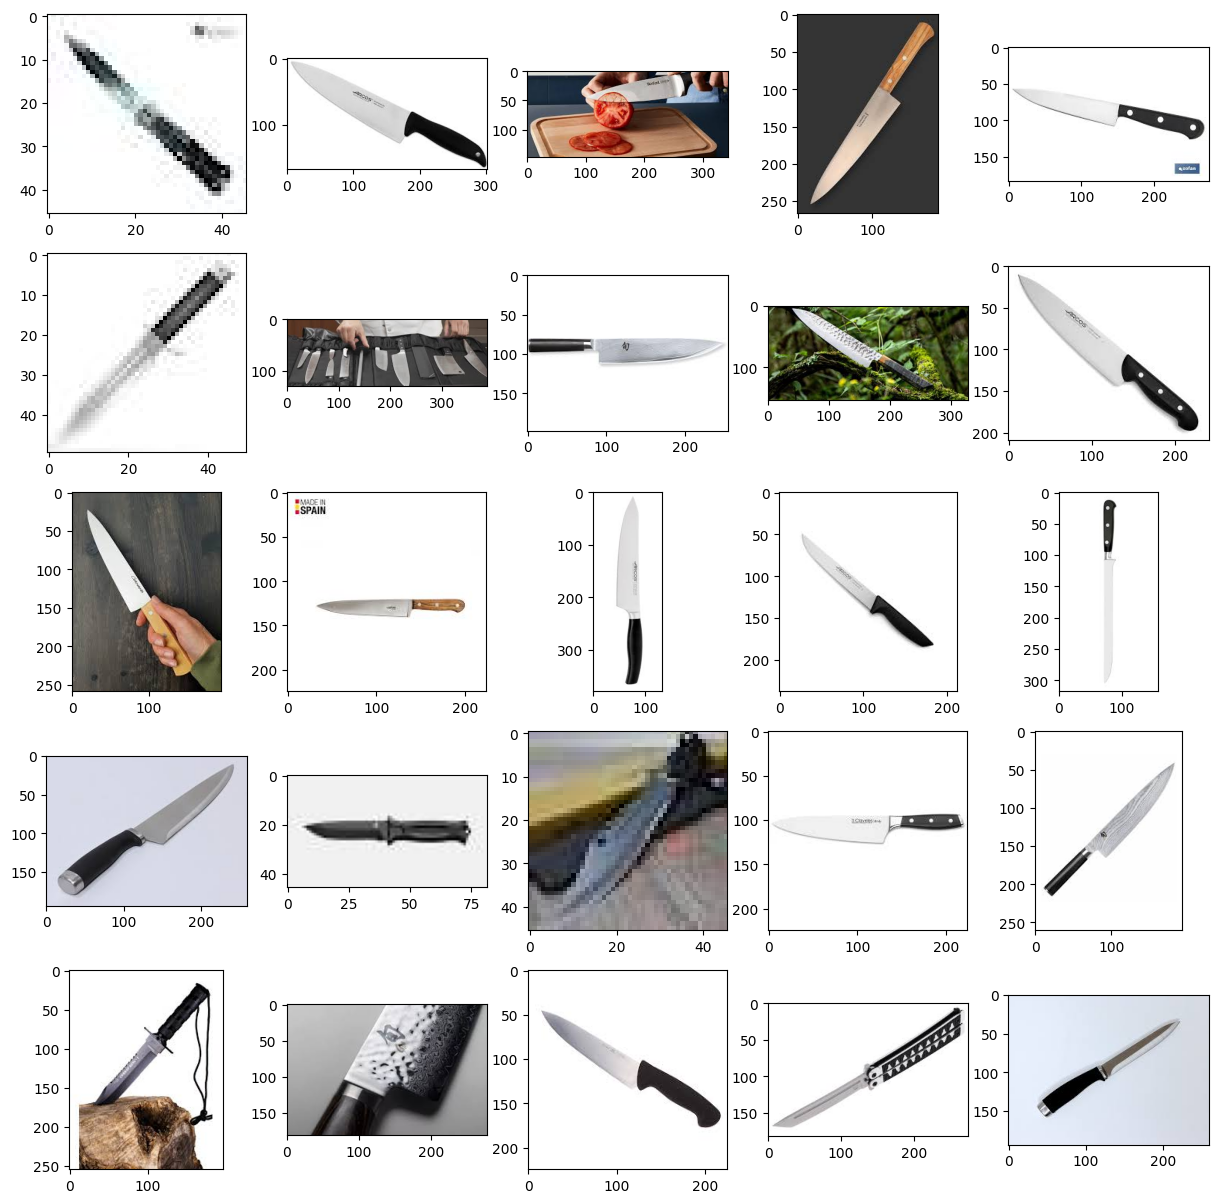

In [34]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'cuchillos'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [12]:
#Crear carpetas para hacer el set de datos

import os

# Definir las carpetas a crear
base_folder = "dataset"
categories = ["cuchillo", "tenedor", "cuchara"]

# Crear la carpeta principal si no existe
if not os.path.exists(base_folder):
    os.makedirs(base_folder)
    print(f"📂 Carpeta creada: {base_folder}")
else:
    print(f"⚠️ La carpeta {base_folder} ya existe")

# Crear las subcarpetas para cada categoría
for category in categories:
    category_path = os.path.join(base_folder, category)
    if not os.path.exists(category_path):
        os.makedirs(category_path)
        print(f"📂 Subcarpeta creada: {category_path}")
    else:
        print(f"⚠️ La subcarpeta {category_path} ya existe")

⚠️ La carpeta dataset ya existe
📂 Subcarpeta creada: dataset\cuchillo
📂 Subcarpeta creada: dataset\tenedor
📂 Subcarpeta creada: dataset\cuchara


In [35]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 387 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = 'cuchillos'
carpeta_destino = 'dataset/cuchillo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [36]:
carpeta_fuente = 'tenedores'
carpeta_destino = 'dataset/tenedor'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [37]:
carpeta_fuente = 'cucharas'
carpeta_destino = 'dataset/cuchara'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 342:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [2]:
# Lista de carpetas donde están las imágenes
import os
folders = ["dataset/cuchara", "dataset/cuchillo", "dataset/tenedor"]

# Contar archivos en cada carpeta
for folder in folders:
    folder_path = os.path.join(os.getcwd(), folder)  # Ruta completa
    if os.path.exists(folder_path):  # Verificar si la carpeta existe
        num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
        print(f"📂 {folder}: {num_files} imágenes")
    else:
        print(f"⚠️ La carpeta {folder} no existe")

📂 dataset/cuchara: 342 imágenes
📂 dataset/cuchillo: 342 imágenes
📂 dataset/tenedor: 342 imágenes


Found 822 images belonging to 3 classes.
Found 204 images belonging to 3 classes.


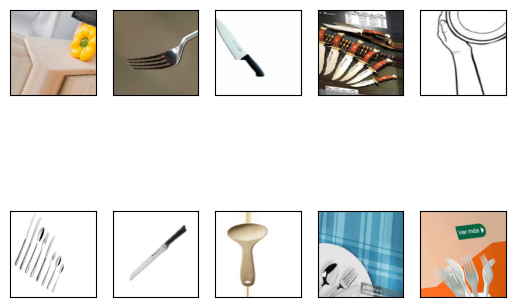

In [3]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [4]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [5]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [6]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [8]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,
    validation_data=data_gen_pruebas
)

Epoch 1/50
26/26 [==============================] - ETA: 0s - batch: 12.5000 - size: 31.6154 - loss: 1.0628 - accuracy: 0.4793

c:\Users\dekad\Desktop\GrupoStudium\3. Segundo DAM\7. Proyecto integrado\Espacio de trabajo\venv\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


26/26 [==============================] - 39s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 1.0629 - accuracy: 0.4793 - val_loss: 0.8227 - val_accuracy: 0.6569
Epoch 2/50
26/26 [==============================] - 28s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 0.6438 - accuracy: 0.7190 - val_loss: 0.6978 - val_accuracy: 0.7157
Epoch 3/50
26/26 [==============================] - 30s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 0.4995 - accuracy: 0.7993 - val_loss: 0.6721 - val_accuracy: 0.7353
Epoch 4/50
26/26 [==============================] - 37s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 0.4774 - accuracy: 0.7981 - val_loss: 0.5178 - val_accuracy: 0.7598
Epoch 5/50
26/26 [==============================] - 31s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 0.4176 - accuracy: 0.8273 - val_loss: 0.4931 - val_accuracy: 0.7843
Epoch 6/50
26/26 [==============================] - 30s 1s/step - batch: 12.5000 - size: 31.6154 - loss: 0.4209 - accuracy: 0.8406 - val_loss: 0.5

acc = [0.49756690859794617, 0.7664233446121216, 0.801703155040741, 0.812652051448822, 0.8090024590492249, 0.8357664346694946, 0.8260340690612793, 0.8357664346694946, 0.8588807582855225, 0.8637469410896301, 0.8588807582855225, 0.8722627758979797, 0.8661800622940063, 0.8673965930938721, 0.8734793066978455, 0.885644793510437, 0.8661800622940063, 0.8844282031059265, 0.8759124279022217, 0.8844282031059265, 0.8917275071144104, 0.8819951415061951, 0.8917275071144104, 0.8746958374977112, 0.8673965930938721, 0.8807786107063293, 0.9002432823181152, 0.8868613243103027, 0.8953770995140076, 0.8953770995140076, 0.8990267515182495, 0.9051094651222229, 0.9087591171264648, 0.8990267515182495, 0.8722627758979797, 0.8844282031059265, 0.8929440379142761, 0.9026764035224915, 0.9111922383308411, 0.8953770995140076, 0.8868613243103027, 0.9075425863265991, 0.9002432823181152, 0.9184914827346802, 0.8868613243103027, 0.8953770995140076, 0.8868613243103027, 0.9136252999305725, 0.9099756479263306, 0.9124087691307

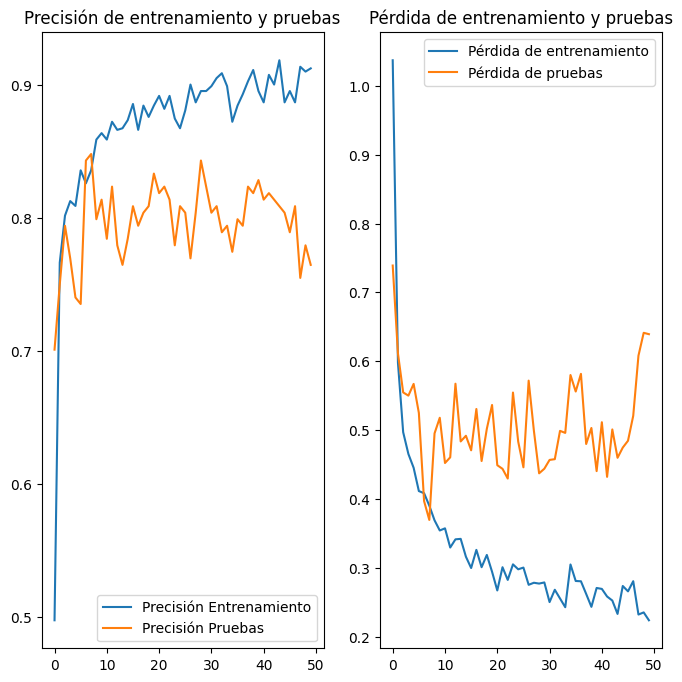

In [9]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

print('acc = ' + str(acc) + ', val_acc = ' + str(val_acc) + ', loss = ' + str(loss) + ', val_loss = ' + str(val_loss))

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content)).convert('RGB')
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [3]:
#0 = cuchara, 1 = cuchillo, 2 = te.nedor
url = 'https://cdn-icons-png.flaticon.com/512/3074/3074535.png' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

NameError: name 'modelo' is not defined